# library yang digunakan

Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,

Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.

read_csv() digunakan untuk membaca file csv

replace() digunakan untuk mengganti nilai

value_counts() digunakan untuk mengitung unik dari kolom

drop() digunakan untuk menghapus

describe() digunakan untuk melihat deskripsi datanya

value_counts() digunakan untuk mengitung unik dari kolom

Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam 
skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.

figure() digunakan untuk membuat figure gambar baru

subplots()digunakan untuk membuat gambar dan satu set subplot

title()digunakan untuk memberi judul pada gambar

ylabel()digunakan untuk memberi label sumbu Y pada gambar

xlabel()digunakan untuk memberi label sumbu Y pada gambar

pie()digunakan untuk membuat pie chart

Seaborn membangun plot di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda 
terlihat lebih cantik.

countplot() digunakan untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable

heatmap() Plot rectangular data as a color-encoded matrix

Scikit-learn adalah library dalam Python yang menyediakan banyak algoritma Machine Learning baik untuk Supervised, Unsupervised Learning, maupun digunakan untuk mempreparasi data.

LabelEncoder() digunakan untuk merubah nilai dari suatu variable menjadi 0 atau 1

train_test_split() digunakan untuk membagi data menjadi 2 row bagian (Training & Testing)

LogisticRegression() digunakan untuk memanggil algoritma Logistic Regression

RandomForestClassifier() digunakan untuk memanggil algoritma Random Forest Classifier

confusion_matrix() digunakan untuk membuat confusion matrix

classification_report() digunakan untuk membuat classification report, yang dianataranya berisi akurasi model

Xgboost adalah library dalam Python untuk algoritma extreme gradient boosting (xgboost)

XGBClassifier() digunakan untuk memanggil algoritma XG Boost Classifier

Pickle mengimplementasikan protokol biner untuk serializing dan de-serializing dari struktur objek Python.

dump() digunakan untuk menyimpan



In [1]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

# Data yang Digunakan

Untuk Dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

 
Untuk detil datanya adalah sebagai berikut:

UpdatedAt Periode of Data taken

customerID Customer ID

gender Whether the customer is a male or a female (Male, Female)

SeniorCitizen Whether the customer is a senior citizen or not (Yes, No)

Partner Whether the customer has a partner or not (Yes, No)

tenure Number of months the customer has stayed with the company

PhoneService Whether the customer has a phone service or not (Yes, No)

InternetService Customer’s internet service provider (Yes, No)

StreamingTV Whether the customer has streaming TV or not (Yes, No)

PaperlessBilling Whether the customer has paperless billing or not (Yes, No)

MonthlyCharges The amount charged to the customer monthly

TotalCharges The total amount charged to the customer

Churn Whether the customer churned or not (Yes, No)

In [2]:
import pandas as pd
#import dataset
df_load = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv")

#Tampilkan bentuk dari dataset
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

(6950, 13)
   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No

# Exploratory Data Analysis

Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:

Univariat Analysis — analisis deskriptif dengan satu variabel.

Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.

Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

Dalam kasus ini, kamu diminta untuk melihat persebaran dari:

Prosentase persebaran data Churn dan tidaknya dari seluruh data

Persebarang data dari variable predictor terhadap label (Churn)

In [3]:
#import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Memvisualisasikan Persentase Churn

Kita ingin melihat visualisasi data secara univariat terkait prosentase data churn dari pelanggan. Gunakan fungsi value_counts() untuk menghitung banyaknya unik dari sebuah kolom, pie() untuk membuat pie chart

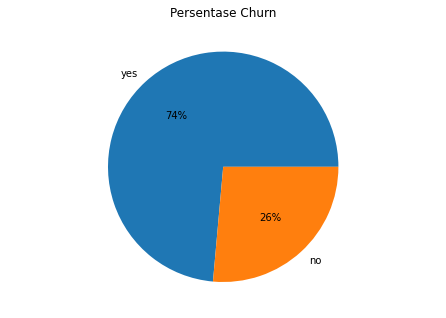

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

#Your codes here
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['yes','no']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Persentase Churn')
plt.show()

# Exploratory Data Analysis (EDA) Variabel Numerik

Hal yang akan kita lakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

Gunakan data `df_load` untuk di olah di tahap ini dan gunakan fungsi `subplots()` untuk membuat gambar dan satu set subplot.

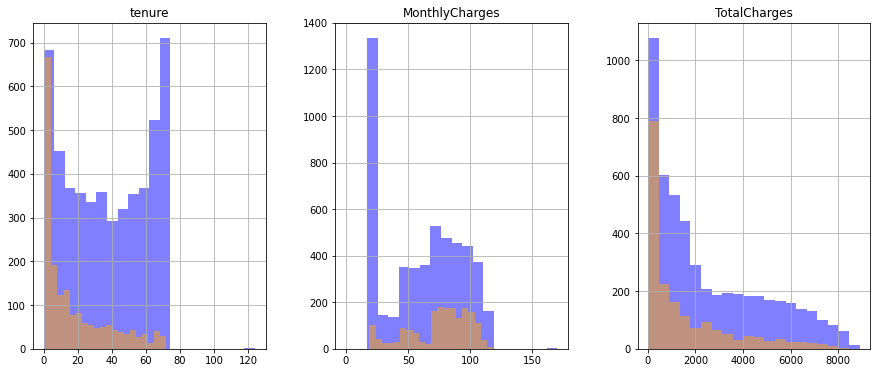

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

#creating bin in chart
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

# Exploratory Data Analysis (EDA) Variabel Kategorik
Setelah itu, kita akan melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya

Gunakan data `df_load` untuk di olah di tahap ini. Gunakan fungsi `countplot()` untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable

Hasil yang diharapkan adalah sebagai berikut. 

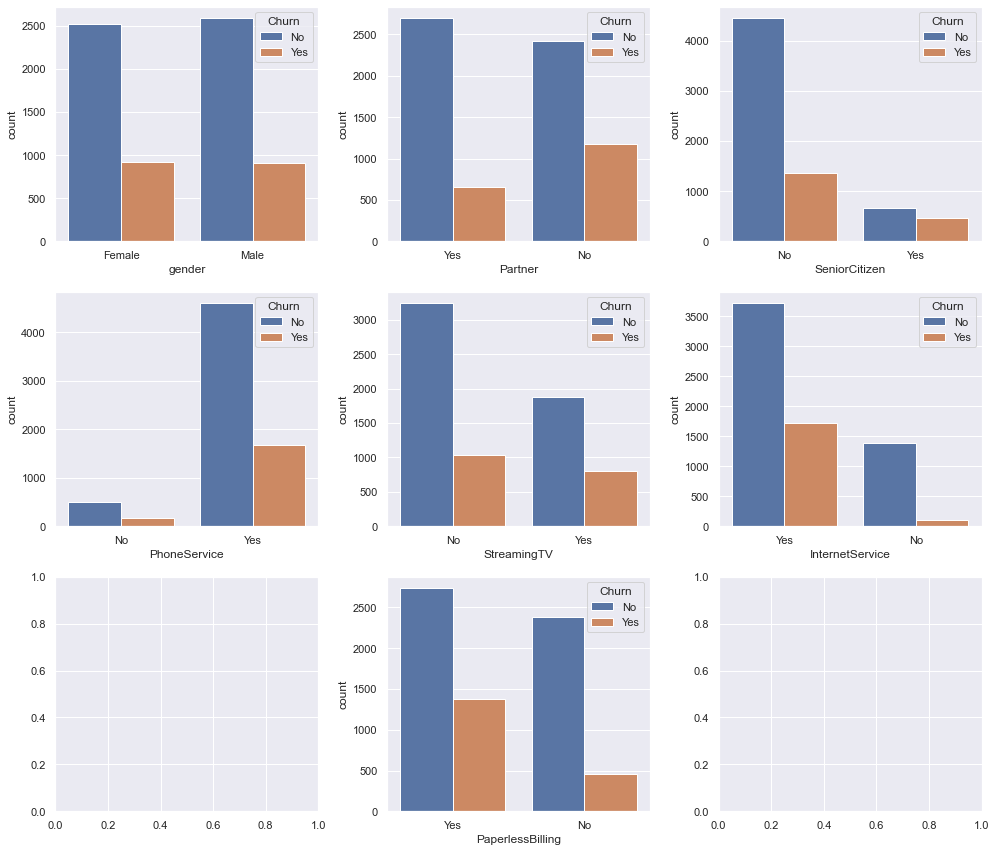

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

# Berdasarkan hasil dan analisa di atas dapat disimpulkan:

pada tahap C.1 dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil Churn sebanyak 26% dan No Churn sebanyak 74%.

pada tahap C.2 dapat kita ketahui bahwa untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.

pada tahap C.3 dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

In [7]:

#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'],axis=1)
print(cleaned_df)

      gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0     Female            No     Yes       1           No          No   
1       Male            No     Yes      60          Yes          No   
2       Male            No      No       5          Yes         Yes   
3     Female            No     Yes      72          Yes         Yes   
4     Female            No     Yes      56          Yes         Yes   
...      ...           ...     ...     ...          ...         ...   
6945    Male            No      No       1          Yes          No   
6946  Female           Yes      No       1          Yes          No   
6947  Female            No      No       1          Yes         Yes   
6948  Female            No     Yes      72          Yes         Yes   
6949    Male            No      No      64          Yes          No   

     InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0                Yes              Yes           29.85         29.85    

# Encoding data

Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk merubah value dari data yang masih berbentuk string untuk diubah ke dalam bentuk numeric menggunakan LabelEncoder(). Gunakan describe() untuk melihat deskripsi datanya.

In [8]:

from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
	if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
	
	cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

C:\Users\ACER\AppData\Local\Temp/ipykernel_20588/122711205.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue


# Splitting Dataset

Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk dibagi datasetnya menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y). Gunakan train_test_split() untuk membagi data tersebut. Sertakan value_counts untuk mengecek apakah pembagian sudah sama proporsinya. Simpan hasil spliting data menjadi x_train, y_train, x_test & y_test

In [9]:


from sklearn.model_selection import train_test_split
# Predictor dan target
X = cleaned_df.drop('Churn',axis=1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:',x_train.shape,',sedangkan Jumlah baris dan kolom dari y_train adalah:',y_train.shape)
print('Prosentase Churn di data training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:',x_test.shape,',sedangkan Jumlah baris dan kolom dari y_test adalah:',y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) ,sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) ,sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


# Kesimpulan

Setelah kita analisis lebih lanjut, ternyata ada kolom yang tidak dibutuhkuan dalam model, yaitu Id Number pelanggannya (customerID) & periode pengambilan datanya (UpdatedAt), maka hal ini perlu dihapus. Kemudian kita lanjut mengubah value dari data yang masih berbentuk string menjadi numeric melalui encoding, setelah dilakukan terlihat di persebaran datanya khususnya kolom min dan max dari masing masing variable sudah berubah menjadi 0 & 1. Tahap terakhir adalah membagi data menjadi 2 bagian untuk keperluan modelling, setelah dilakukan terlihat dari jumlah baris dan kolom masing-masing data sudah sesuai & prosentase kolom churn juga sama dengan data di awal, hal ini mengindikasikan bahwasannya data terpisah dengan baik dan benar.